In [1]:
from pyspark import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Big data e Deployment de Modelos

Exemplo Aula Prof. Helder Prado Santos
MBA Data Science Analytics USP/ESALQ

## Utilizando Spark para Ler Arquivos com Grande Volume de Dados

Documentação PySpark: https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/index.html

CONHECENDO NOSSOS DADOS <br>
fonte: https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?resource=download&select=2017.csv

Airline Delay and Cancellation Data, 2009 - 2018 <br>
pasta datasets -> dois arquivos -> 1 de aproximadamente 700MB e outro de aproximadamente 476MB

# Dados Voos 2017

In [2]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [3]:
# Carregando a Base em spark

#https://spark.apache.org/docs/latest/api/python/

spark = SparkSession.builder.appName("ImportCSV").getOrCreate()

path = r'C:\Users\leomu\OneDrive\MBA\Big Data\Aula 1\scripts\datasets\voos-avioes\2017.csv'

df = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(path)

In [21]:
# Configurando a visualização para padrão jupyter
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

df

FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,1143.0,26.0,1142,1209.0,27.0,0.0,null,0.0,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0
2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,1757.0,12.0,1727,1809.0,42.0,0.0,null,0.0,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0
2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,2025.0,15.0,1958,2040.0,42.0,0.0,null,0.0,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0
2017-01-01,AA,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,1744.0,5.0,1612,1749.0,97.0,0.0,null,0.0,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0
2017-01-01,AA,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,631.0,11.0,600,642.0,42.0,0.0,null,0.0,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0
2017-01-01,AA,7,DFW,OGG,940,1619.0,399.0,12.0,1631.0,2031.0,6.0,1403,2037.0,394.0,0.0,null,0.0,503.0,498.0,480.0,3711.0,394.0,0.0,0.0,0.0,0.0
2017-01-01,AA,8,HNL,DFW,1838,1903.0,25.0,19.0,1922.0,636.0,12.0,550,648.0,58.0,0.0,null,0.0,432.0,465.0,434.0,3784.0,25.0,0.0,33.0,0.0,0.0
2017-01-01,AA,9,JFK,SFO,700,656.0,-4.0,22.0,718.0,1020.0,3.0,1045,1023.0,-22.0,0.0,null,0.0,405.0,387.0,362.0,2586.0,null,null,null,null,null
2017-01-01,AA,10,LAX,JFK,2100,2100.0,0.0,15.0,2115.0,447.0,10.0,527,457.0,-30.0,0.0,null,0.0,327.0,297.0,272.0,2475.0,null,null,null,null,null
2017-01-01,AA,12,SFO,JFK,1135,1130.0,-5.0,27.0,1157.0,1937.0,17.0,2018,1954.0,-24.0,0.0,null,0.0,343.0,324.0,280.0,2586.0,null,null,null,null,null


In [8]:
df = df.drop('Unnamed: 27')

In [6]:
# Verificando as colunas
df.printSchema()

root
 |-- FL_DATE: date (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: doub

## Descritiva de Colunas Selecionadas

In [7]:
df.select("CRS_DEP_TIME", "DEP_TIME", "CANCELLED").describe().show()

+-------+------------------+------------------+--------------------+
|summary|      CRS_DEP_TIME|          DEP_TIME|           CANCELLED|
+-------+------------------+------------------+--------------------+
|  count|           5674621|           5594313|             5674621|
|   mean|1329.9688317510545|1333.7043910485525|0.014572426951509185|
| stddev|490.93756967830365|504.39871426708186| 0.11983352558791949|
|    min|                 1|               1.0|                 0.0|
|    max|              2359|            2400.0|                 1.0|
+-------+------------------+------------------+--------------------+



# Selecionando Apenas Voos Cancelados

PySpark DataFrame also provides the conversion back to a pandas DataFrame to leverage pandas API. <br> 
Note that toPandas also collects all data into the driver side that can easily cause an out-of-memory-error when the data is too large to fit into the driver side.

In [8]:
voos_cancelados = df.filter(col('CANCELLED')==1)
voos_cancelados

FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
2017-01-01,AA,106,PHX,JFK,957,null,null,null,null,null,null,1653,null,null,1.0,A,0.0,296.0,null,null,2153.0,null,null,null,null,null
2017-01-01,AA,229,DFW,KOA,1030,null,null,null,null,null,null,1458,null,null,1.0,A,0.0,508.0,null,null,3724.0,null,null,null,null,null
2017-01-01,AA,230,KOA,DFW,1840,null,null,null,null,null,null,559,null,null,1.0,A,0.0,439.0,null,null,3724.0,null,null,null,null,null
2017-01-01,AA,1896,DFW,PHX,1730,null,null,null,null,null,null,1906,null,null,1.0,A,0.0,156.0,null,null,868.0,null,null,null,null,null
2017-01-01,NK,218,FLL,ACY,740,null,null,null,null,null,null,1006,null,null,1.0,A,0.0,146.0,null,null,977.0,null,null,null,null,null
2017-01-01,NK,235,ACY,FLL,1225,null,null,null,null,null,null,1512,null,null,1.0,A,0.0,167.0,null,null,977.0,null,null,null,null,null
2017-01-01,NK,259,ACY,FLL,700,null,null,null,null,null,null,946,null,null,1.0,A,0.0,166.0,null,null,977.0,null,null,null,null,null
2017-01-01,NK,341,ACY,TPA,1056,null,null,null,null,null,null,1334,null,null,1.0,A,0.0,158.0,null,null,913.0,null,null,null,null,null
2017-01-01,NK,348,TPA,ACY,1424,null,null,null,null,null,null,1639,null,null,1.0,A,0.0,135.0,null,null,913.0,null,null,null,null,null
2017-01-01,NK,365,RSW,BWI,1941,null,null,null,null,null,null,2200,null,null,1.0,A,0.0,139.0,null,null,919.0,null,null,null,null,null


In [9]:
pd_cancelados = voos_cancelados.toPandas()

In [10]:
pd_cancelados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82693 entries, 0 to 82692
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FL_DATE              82693 non-null  object 
 1   OP_CARRIER           82693 non-null  object 
 2   OP_CARRIER_FL_NUM    82693 non-null  int32  
 3   ORIGIN               82693 non-null  object 
 4   DEST                 82693 non-null  object 
 5   CRS_DEP_TIME         82693 non-null  int32  
 6   DEP_TIME             2385 non-null   float64
 7   DEP_DELAY            2351 non-null   float64
 8   TAXI_OUT             548 non-null    float64
 9   WHEELS_OFF           552 non-null    float64
 10  WHEELS_ON            0 non-null      float64
 11  TAXI_IN              0 non-null      float64
 12  CRS_ARR_TIME         82693 non-null  int32  
 13  ARR_TIME             0 non-null      float64
 14  ARR_DELAY            0 non-null      float64
 15  CANCELLED            82693 non-null 

In [11]:
pd_cancelados.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,82693.000000,82693.000000,2385.000000,2351.000000,548.000000,552.000000,0.0,0.0,82693.000000,0.0,...,82693.000000,82686.000000,0.0,0.0,82693.000000,0.0,0.0,0.0,0.0,0.0
mean,2290.053801,1373.555150,1527.490985,68.281157,21.122263,1504.961957,NaN,NaN,1516.060549,NaN,...,0.000157,136.245725,NaN,NaN,757.257120,NaN,NaN,NaN,NaN,NaN
std,1804.011815,508.442672,546.612096,121.436212,12.808162,594.458408,NaN,NaN,540.602000,NaN,...,0.012537,67.224895,NaN,NaN,544.362769,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,3.000000,-24.000000,6.000000,1.000000,NaN,NaN,1.000000,NaN,...,0.000000,21.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN
25%,795.000000,923.000000,1147.000000,-2.000000,13.000000,1103.500000,NaN,NaN,1059.000000,NaN,...,0.000000,85.000000,NaN,NaN,337.000000,NaN,NaN,NaN,NaN,NaN
50%,1767.000000,1415.000000,1623.000000,23.000000,18.000000,1555.500000,NaN,NaN,1555.000000,NaN,...,0.000000,123.000000,NaN,NaN,636.000000,NaN,NaN,NaN,NaN,NaN
75%,3875.000000,1810.000000,1952.000000,97.000000,25.000000,2036.250000,NaN,NaN,1954.000000,NaN,...,0.000000,170.000000,NaN,NaN,1021.000000,NaN,NaN,NaN,NaN,NaN
max,7439.000000,2359.000000,2359.000000,1341.000000,101.000000,2359.000000,NaN,NaN,2359.000000,NaN,...,1.000000,712.000000,NaN,NaN,4983.000000,NaN,NaN,NaN,NaN,NaN


## Trabalhando na Base

Flag voos atrasados, considerar voos atrasados tempo de atraso na chegada > 15 min

In [9]:
#Trabalhando no Spark
# Criando Campo Atrasado
dados_voos_2017 = df.withColumn('ATRASADO', when(col('ARR_DELAY').isNull(), 'NA').when(col('ARR_DELAY') >= 15, '1').otherwise('0'))

In [13]:
dados_voos_2017

FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ATRASADO
2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,1143.0,26.0,1142,1209.0,27.0,0.0,null,0.0,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,1
2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,1757.0,12.0,1727,1809.0,42.0,0.0,null,0.0,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,1
2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,2025.0,15.0,1958,2040.0,42.0,0.0,null,0.0,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,1
2017-01-01,AA,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,1744.0,5.0,1612,1749.0,97.0,0.0,null,0.0,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,1
2017-01-01,AA,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,631.0,11.0,600,642.0,42.0,0.0,null,0.0,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,1
2017-01-01,AA,7,DFW,OGG,940,1619.0,399.0,12.0,1631.0,2031.0,6.0,1403,2037.0,394.0,0.0,null,0.0,503.0,498.0,480.0,3711.0,394.0,0.0,0.0,0.0,0.0,1
2017-01-01,AA,8,HNL,DFW,1838,1903.0,25.0,19.0,1922.0,636.0,12.0,550,648.0,58.0,0.0,null,0.0,432.0,465.0,434.0,3784.0,25.0,0.0,33.0,0.0,0.0,1
2017-01-01,AA,9,JFK,SFO,700,656.0,-4.0,22.0,718.0,1020.0,3.0,1045,1023.0,-22.0,0.0,null,0.0,405.0,387.0,362.0,2586.0,null,null,null,null,null,0
2017-01-01,AA,10,LAX,JFK,2100,2100.0,0.0,15.0,2115.0,447.0,10.0,527,457.0,-30.0,0.0,null,0.0,327.0,297.0,272.0,2475.0,null,null,null,null,null,0
2017-01-01,AA,12,SFO,JFK,1135,1130.0,-5.0,27.0,1157.0,1937.0,17.0,2018,1954.0,-24.0,0.0,null,0.0,343.0,324.0,280.0,2586.0,null,null,null,null,null,0


### Quantidade de voos Atrasados

In [14]:
# Total de Linhas
total = dados_voos_2017.count()

# Agrupando voos Cancelados
dados_agrupados_atrasado = dados_voos_2017.groupBy('ATRASADO').count().withColumnRenamed("count", "Quantidade")

In [15]:
# Transformando agrupamento em um Pandas DataFrame (memoria python)
dados_agrupados_atrasado_py = dados_agrupados_atrasado.toPandas()

# Criando COluna %
dados_agrupados_atrasado_py['%'] = dados_agrupados_atrasado_py.Quantidade.apply(lambda x: x/total*100)

In [16]:
dados_agrupados_atrasado_py

,ATRASADO,Quantidade,%
0,0,4549936,80.180438
1,NA,95211,1.677839
2,1,1029474,18.141723


### Gráfico Comparativo

<Axes: xlabel='ATRASADO', ylabel='Quantidade'>

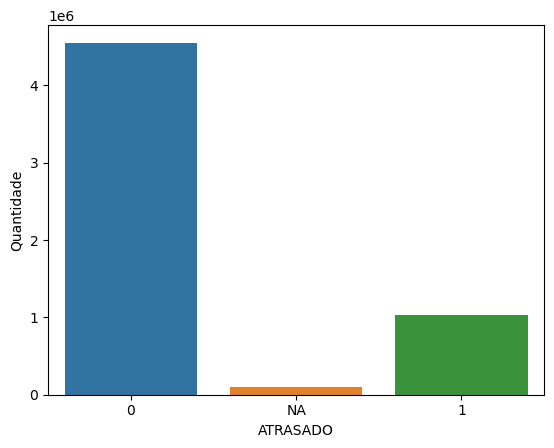

In [17]:
sns.barplot(data=dados_agrupados_atrasado_py, x="ATRASADO", y="Quantidade")

# Dados Voos  2018

In [5]:
# Carregando a Base em spark

#https://spark.apache.org/docs/latest/api/python/

spark = SparkSession.builder.appName("ImportCSV").getOrCreate()

path = r'C:\Users\leomu\OneDrive\MBA\Big Data\Aula 1\scripts\datasets\voos-avioes\2018.csv'

df_18 = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(path)

In [19]:
df_18

FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,null,0.0,268.0,250.0,225.0,1605.0,null,null,null,null,null,null
2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,null,0.0,99.0,83.0,65.0,414.0,null,null,null,null,null,null
2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,null,0.0,134.0,126.0,106.0,846.0,null,null,null,null,null,null
2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,null,0.0,190.0,182.0,157.0,1120.0,null,null,null,null,null,null
2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,null,0.0,112.0,106.0,83.0,723.0,null,null,null,null,null,null
2018-01-01,UA,2422,ORD,OMA,2241,2244.0,3.0,15.0,2259.0,1.0,2.0,14,3.0,-11.0,0.0,null,0.0,93.0,79.0,62.0,416.0,null,null,null,null,null,null
2018-01-01,UA,2421,IAH,LAS,750,747.0,-3.0,14.0,801.0,854.0,6.0,916,900.0,-16.0,0.0,null,0.0,206.0,193.0,173.0,1222.0,null,null,null,null,null,null
2018-01-01,UA,2420,DEN,CID,1324,1318.0,-6.0,11.0,1329.0,1554.0,6.0,1619,1600.0,-19.0,0.0,null,0.0,115.0,102.0,85.0,692.0,null,null,null,null,null,null
2018-01-01,UA,2419,SMF,EWR,2224,2237.0,13.0,10.0,2247.0,627.0,9.0,638,636.0,-2.0,0.0,null,0.0,314.0,299.0,280.0,2500.0,null,null,null,null,null,null
2018-01-01,UA,2418,RIC,DEN,1601,1559.0,-2.0,12.0,1611.0,1748.0,8.0,1813,1756.0,-17.0,0.0,null,0.0,252.0,237.0,217.0,1482.0,null,null,null,null,null,null


In [6]:
df_18 = df_18.drop('Unnamed: 27')

In [21]:
df_18.printSchema()

root
 |-- FL_DATE: date (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: doub

In [7]:
# Criando Campo Atrasado
dados_voos_2018 = df_18.withColumn('ATRASADO', when(col('ARR_DELAY').isNull(), 'NA').when(col('ARR_DELAY') >= 15, '1').otherwise('0'))

In [23]:
dados_voos_2018

FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ATRASADO
2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,null,0.0,268.0,250.0,225.0,1605.0,null,null,null,null,null,0
2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,null,0.0,99.0,83.0,65.0,414.0,null,null,null,null,null,0
2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,null,0.0,134.0,126.0,106.0,846.0,null,null,null,null,null,0
2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,null,0.0,190.0,182.0,157.0,1120.0,null,null,null,null,null,0
2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,null,0.0,112.0,106.0,83.0,723.0,null,null,null,null,null,0
2018-01-01,UA,2422,ORD,OMA,2241,2244.0,3.0,15.0,2259.0,1.0,2.0,14,3.0,-11.0,0.0,null,0.0,93.0,79.0,62.0,416.0,null,null,null,null,null,0
2018-01-01,UA,2421,IAH,LAS,750,747.0,-3.0,14.0,801.0,854.0,6.0,916,900.0,-16.0,0.0,null,0.0,206.0,193.0,173.0,1222.0,null,null,null,null,null,0
2018-01-01,UA,2420,DEN,CID,1324,1318.0,-6.0,11.0,1329.0,1554.0,6.0,1619,1600.0,-19.0,0.0,null,0.0,115.0,102.0,85.0,692.0,null,null,null,null,null,0
2018-01-01,UA,2419,SMF,EWR,2224,2237.0,13.0,10.0,2247.0,627.0,9.0,638,636.0,-2.0,0.0,null,0.0,314.0,299.0,280.0,2500.0,null,null,null,null,null,0
2018-01-01,UA,2418,RIC,DEN,1601,1559.0,-2.0,12.0,1611.0,1748.0,8.0,1813,1756.0,-17.0,0.0,null,0.0,252.0,237.0,217.0,1482.0,null,null,null,null,null,0


In [24]:
# Total de Linhas
total = dados_voos_2018.count()

# Agrupando voos Cancelados
dados_agrupados_atrasado_18 = dados_voos_2018.groupBy('ATRASADO').count().withColumnRenamed("count", "Quantidade")

# Transformando agrupamento em um Pandas DataFrame (memoria python)
dados_agrupados_atrasado_18_py = dados_agrupados_atrasado_18.toPandas()

# Criando COluna %
dados_agrupados_atrasado_18_py['%'] = dados_agrupados_atrasado_18_py.Quantidade.apply(lambda x: x/total*100)

In [25]:
dados_agrupados_atrasado_18_py

,ATRASADO,Quantidade,%
0,0,3192144,79.090402
1,NA,88069,2.182048
2,1,755857,18.727549


<Axes: xlabel='ATRASADO', ylabel='Quantidade'>

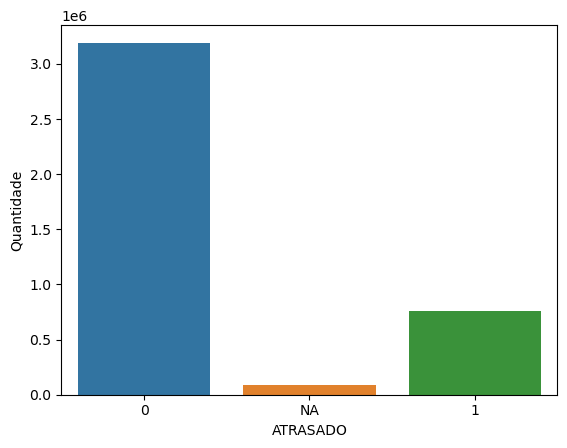

In [26]:
sns.barplot(data=dados_agrupados_atrasado_18_py, x="ATRASADO", y="Quantidade")

# Empilhando as Duas Bases

In [10]:
dados_voos_completo = dados_voos_2017.unionAll(dados_voos_2018)

In [11]:
dados_voos_completo.count()

9710691

### Estratégia de Contagem de Linhas em um Banco de Dados muito grande

Pega-se uma amostra percentual da base (ex. 0.01) e conta as linhas dessa base amostral.
Depois divide a quantidade de linhas pelo percentual amostral para chegar no resultado aproximado da quantidade de linhas total.

ex. Aula:

Amostra: 0.01 -> 96790 <br>
Total Aprox = 96790/0.01 = 9,679,000

# Modelo de Regressão Linear

Desenvolver um modelo para calcular tempo decorrido real em relação à distância percorrida o mais simples possível.
<br>
<br>
<center> ACTUAL_ELAPSED_TIME = b0 + b1*DISTANCE </center>

In [32]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.stat import Correlation

In [30]:
# Selecionando apenas Colunas de Interesse


dados_selecionados = dados_voos_completo.select(dados_voos_completo.ACTUAL_ELAPSED_TIME, 
                                                dados_voos_completo.DISTANCE)

# Removendo Nulos
dados_selecionados = dados_selecionados.dropna(how ='any')

In [31]:
dados_selecionados.count()

9529559

## Correlações

In [32]:
dados_selecionados.corr('ACTUAL_ELAPSED_TIME', 'DISTANCE')

0.9709730560282152

In [33]:
# Selecionando uma Amostra de 1% para Construção do Gráfico
pequena_amostra = dados_selecionados.sample(0.01)

In [34]:
pequena_amostra.count()

95597

In [35]:
pequena_amostra

ACTUAL_ELAPSED_TIME,DISTANCE
164.0,1303.0
145.0,602.0
123.0,544.0
75.0,387.0
167.0,1182.0
113.0,585.0
162.0,911.0
148.0,913.0
113.0,737.0
43.0,73.0


### Gráfico de Dispersão 

In [36]:
pd_peq_amostra = pequena_amostra.toPandas()

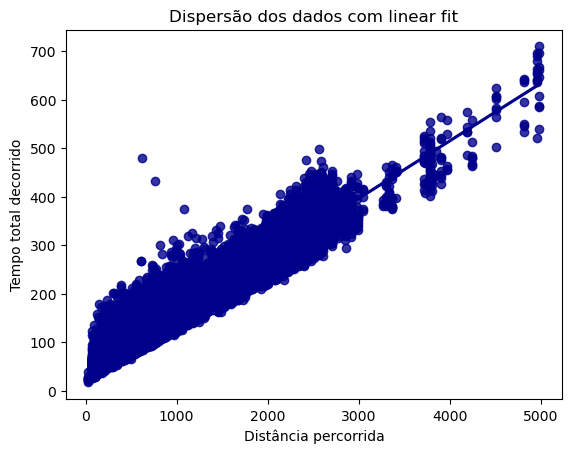

In [37]:
plt.figure('ggplot')

sns.regplot(x="DISTANCE", y="ACTUAL_ELAPSED_TIME", data=pd_peq_amostra, color='darkblue')
plt.title('Dispersão dos dados com linear fit')
plt.xlabel('Distância percorrida')
plt.ylabel('Tempo total decorrido')
plt.show()

## Aplicação do Modelo

In [38]:
# Preparando o Modelo
input_cols = ["DISTANCE"] #variavel independente
output_col = "ACTUAL_ELAPSED_TIME" #variavel dependente

In [39]:
# criar um VectorAssembler para combinar as colunas de features em um vetor
assembler = VectorAssembler(inputCols= input_cols, outputCol= 'features')
df_reg = assembler.transform(dados_selecionados)


In [40]:
# criar um objeto LinearRegression
lr = LinearRegression(featuresCol="features", labelCol=output_col)

# Treina o Modelo
modelo_linear = lr.fit(df_reg)

In [41]:
# Resultados
summary = modelo_linear.summary

print(f'Intercepto: {modelo_linear.intercept:.2f}')
print(f'{input_cols}: {modelo_linear.coefficients}')
print(f'RMSE: {summary.rootMeanSquaredError:.4f}')
print(f'R2: {summary.r2:.4f}')

Intercepto: 40.34
['DISTANCE']: [0.11894640317386675]
RMSE: 18.0259
R2: 0.9428


In [42]:
modelo_linear.coefficients

DenseVector([0.1189])

### Valores Preditos

In [43]:
summary.predictions

ACTUAL_ELAPSED_TIME,DISTANCE,features,prediction
398.0,2475.0,[2475.0],334.7303811693307
335.0,2475.0,[2475.0],334.7303811693307
319.0,2475.0,[2475.0],334.7303811693307
537.0,3784.0,[3784.0],490.4312229239223
467.0,3711.0,[3711.0],481.74813549223006
498.0,3711.0,[3711.0],481.74813549223006
465.0,3784.0,[3784.0],490.4312229239223
387.0,2586.0,[2586.0],347.9334319216299
297.0,2475.0,[2475.0],334.7303811693307
324.0,2586.0,[2586.0],347.9334319216299


### Correlação Entre Valores Reais e Valores Preditos

In [44]:
# R2 através da Correlação
summary.predictions.corr('ACTUAL_ELAPSED_TIME', 'prediction')**2

0.9427886755327488

### Resíduos

In [45]:
#Amostra dos Resíduos
residuos = summary.residuals.sample(0.01).toPandas()

<Axes: ylabel='Count'>

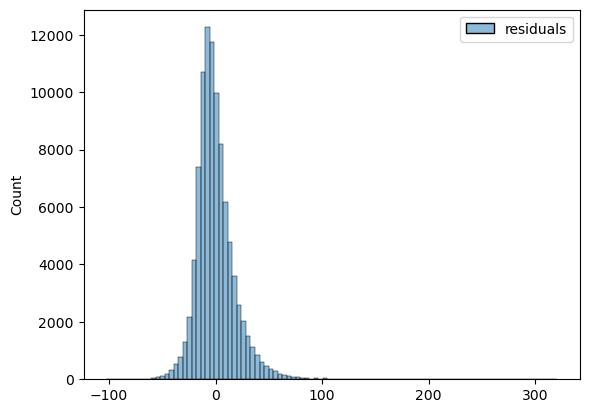

In [46]:
sns.histplot(residuos, bins = 100)

### Previsão

In [47]:
from pyspark.ml.linalg import Vectors

# criar a lista de valores como um objeto Vector do PySpark
dados_novos = [2000]
dados_novos_spk = [Vectors.dense(dados_novos)]

# criar um pandas.DataFrame a partir da lista de valores
pandasDF = pd.DataFrame({'features': dados_novos_spk})

# criar um DataFrame no PySpark a partir do pandas.DataFrame
dados_novos_spk = spark.createDataFrame(pandasDF)

In [48]:
predict = modelo_linear.transform(dados_novos_spk)

In [49]:
predict

features,prediction
[2000.0],278.23083966174397


## Regressão Logística

Modelo para calcular se o voo vai atrasar para chegar ou não baseado nas variáveis do banco de dados:

Depedende: ATRASADO

In [12]:
dados_voos_completo.printSchema()

root
 |-- FL_DATE: date (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: doub

### Descritiva Variáveis Tempo

In [13]:
# Criando as variáveis de tempo e renomeando
dados_voos_completo_tratado = dados_voos_completo \
    .withColumn('MES', month('FL_DATE')) \
    .withColumn('DIA_DA_SEMANA', dayofweek('FL_DATE')) \
    .withColumn('ATRASO_PARTIDA', col('DEP_DELAY')) \
    .withColumn('ATRASO_CHEGADA', col('ARR_DELAY'))


# Transformando as variáveis categóricas para string - DUMMIZAÇÃO EXIGE QUE SEJA NUMÉRICO
#dados_voos_completo_tratado = dados_voos_completo_tratado \
#    .withColumn('MES', col('MES').cast('string')) \
#    .withColumn('DIA_DA_SEMANA', col('DIA_DA_SEMANA').cast('string'))

In [14]:
dados_voos_completo_tratado.printSchema()

root
 |-- FL_DATE: date (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: doub

### Média Atraso na Chegada por Dia da Semana

In [15]:
# Amostra para verificar a relação entre as variáveis
amostra_voos_completo_tratado_py = dados_voos_completo_tratado.groupBy('DIA_DA_SEMANA')\
    .agg(mean('ATRASO_CHEGADA').alias('media_atraso_chegada')).toPandas()

In [54]:
amostra_voos_completo_tratado_py.sort_values('DIA_DA_SEMANA')
#1 - Domingo
#7 - Sábado

,DIA_DA_SEMANA,media_atraso_chegada
0,1,4.351062
6,2,6.426059
2,3,3.306794
4,4,3.499227
3,5,5.753909
1,6,6.633249
5,7,1.483857


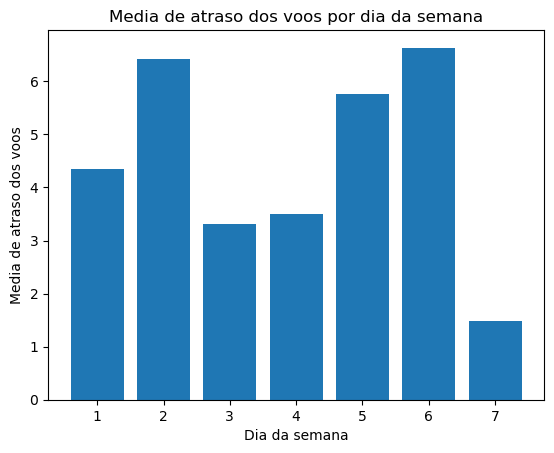

In [55]:
#1 - Domingo
#7 - Sábado

plt.bar(x='DIA_DA_SEMANA', height='media_atraso_chegada', data=amostra_voos_completo_tratado_py.sort_values('DIA_DA_SEMANA'))
plt.title('Media de atraso dos voos por dia da semana')
plt.ylabel('Media de atraso dos voos')
plt.xlabel('Dia da semana')
plt.show()

### Média Atraso na Chegada por Mes

In [56]:
# Amostra para verificar a relação entre as variáveis
amostra_voos_completo_tratado_py = dados_voos_completo_tratado.groupBy('MES')\
    .agg(mean('ATRASO_CHEGADA').alias('media_atraso_chegada')).toPandas()

In [57]:
amostra_voos_completo_tratado_py

,MES,media_atraso_chegada
0,1,4.661002
1,3,3.047836
2,2,2.360759
3,5,5.925216
4,4,5.236692
5,6,8.777683
6,7,8.297988
7,9,-0.555612
8,8,6.692595
9,10,1.179531


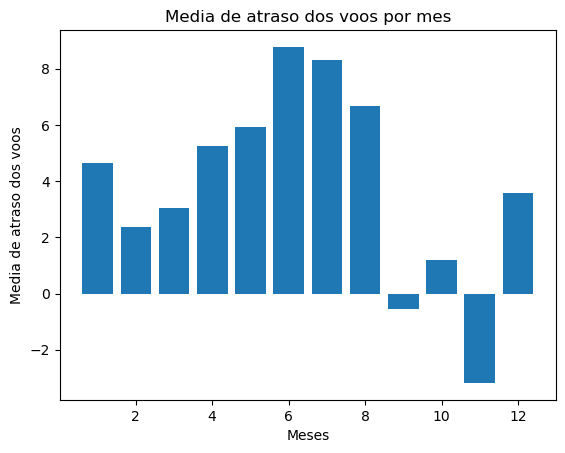

In [58]:
plt.bar(x='MES', height='media_atraso_chegada', data=amostra_voos_completo_tratado_py.sort_values('MES'))
plt.title('Media de atraso dos voos por mes')
plt.ylabel('Media de atraso dos voos')
plt.xlabel('Meses')
plt.show()

## Selecionando e Tratando as Variáveis do Modelo

In [16]:
# Selecionado as variáveis de tempo
dados_modelo_atraso = dados_voos_completo_tratado.select('ATRASADO','CRS_DEP_TIME','MES','DIA_DA_SEMANA', 'DISTANCE')

In [17]:
dados_modelo_atraso.printSchema()

root
 |-- ATRASADO: string (nullable = false)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- MES: integer (nullable = true)
 |-- DIA_DA_SEMANA: integer (nullable = true)
 |-- DISTANCE: double (nullable = true)



In [61]:
dados_modelo_atraso.describe().show()

+-------+-------------------+-----------------+------------------+------------------+----------------+
|summary|           ATRASADO|     CRS_DEP_TIME|               MES|     DIA_DA_SEMANA|        DISTANCE|
+-------+-------------------+-----------------+------------------+------------------+----------------+
|  count|            9710691|          9710690|           9710691|           9710691|         9710690|
|   mean|0.18738889295318528|1330.521060501365| 5.486819835993134|3.9404384301796855|833.922037568906|
| stddev| 0.3902234125904336|491.6049728462533|3.1446586318546457|1.9609551061200807|614.302591516966|
|    min|                  0|                1|                 1|                 1|            31.0|
|    max|                 NA|             2359|                12|                 7|          4983.0|
+-------+-------------------+-----------------+------------------+------------------+----------------+



In [18]:
#Criando variável Hora para cada 400 min.

from pyspark.ml.feature import Bucketizer

# Definir os limites dos buckets
limites = list(range(0, 2400, 400)) + [float('inf')]

# Criar o objeto Bucketizer
bucketizer = Bucketizer(splits=limites, inputCol='CRS_DEP_TIME', outputCol='HORA')

# Aplicar o Bucketizer ao DataFrame
dados_modelo_atraso = bucketizer.transform(dados_modelo_atraso)

In [22]:
dados_modelo_atraso

ATRASADO,CRS_DEP_TIME,MES,DIA_DA_SEMANA,DISTANCE,HORA
1,800,1,1,2475.0,2.0
1,900,1,1,2475.0,2.0
1,1130,1,1,2475.0,2.0
1,1135,1,1,3784.0,2.0
1,1855,1,1,3711.0,4.0
1,940,1,1,3711.0,2.0
1,1838,1,1,3784.0,4.0
0,700,1,1,2586.0,1.0
0,2100,1,1,2475.0,5.0
0,1135,1,1,2586.0,2.0


In [20]:
dados_modelo_atraso.count()

9710691

In [23]:
# Removendo missing values
dados_modelo_atraso = dados_modelo_atraso.where(col('ATRASADO') != 'NA')

In [24]:
dados_modelo_atraso.count()

9527411

In [25]:
# Transformando variável ATRASADO em numérica (modelo logistico exige ser numérico)
dados_modelo_atraso = dados_modelo_atraso.withColumn('ATRASADO', col('ATRASADO').cast('integer'))

In [26]:
dados_modelo_atraso.printSchema()

root
 |-- ATRASADO: integer (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- MES: integer (nullable = true)
 |-- DIA_DA_SEMANA: integer (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- HORA: double (nullable = true)



### Dummizando

In [27]:
from pyspark.ml.feature import OneHotEncoder

# Especifica as colunas de entrada e saída
cols_in = ['MES', 'DIA_DA_SEMANA']
cols_out = ['MES_CAT', 'DIA_DA_SEMANA_CAT']

# Cria um objeto OneHotEncoderEstimator
encoder = OneHotEncoder(
    inputCols=cols_in,
    outputCols=cols_out
)

# Ajusta o modelo aos dados
model_dummie = encoder.fit(dados_modelo_atraso)

# Transforma os dados
dados_modelo_atraso_dum = model_dummie.transform(dados_modelo_atraso)

In [28]:
dados_modelo_atraso_dum.printSchema()

root
 |-- ATRASADO: integer (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- MES: integer (nullable = true)
 |-- DIA_DA_SEMANA: integer (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- HORA: double (nullable = true)
 |-- MES_CAT: vector (nullable = true)
 |-- DIA_DA_SEMANA_CAT: vector (nullable = true)



## Aplicando Modelo Regressão Logística

Referência: https://medium.com/swlh/logistic-regression-with-pyspark-60295d41221 <br>
Dumentação: https://spark.apache.org/docs/latest/ml-classification-regression.html#logistic-regression

In [29]:
from pyspark.ml.classification import LogisticRegression

In [30]:
# Preparando o Modelo

output_col = "ATRASADO" #variavel dependente
input_cols = ["DIA_DA_SEMANA_CAT", 'HORA', 'MES_CAT', 'DISTANCE'] #variavel independente


In [33]:
# criar um VectorAssembler para combinar as colunas de features em um vetor
assembler = VectorAssembler(inputCols= input_cols, outputCol= 'features')
df_reg = assembler.transform(dados_modelo_atraso_dum)

In [39]:
# criar um objeto LinearRegression
logr = LogisticRegression(featuresCol="features", labelCol=output_col, 
                          maxIter=10, 
                          regParam=0.3, 
                          elasticNetParam=0.8, 
                          family='binomial')

# Treina o Modelo
modelo_atraso_voos = logr.fit(df_reg)

In [35]:
summary = modelo_atraso_voos.summary

print(f'Intercepto: {modelo_atraso_voos.intercept:.2f}')
print(f'ROC: {summary.areaUnderROC:.2f}')
print(f'Accuracy: {summary.accuracy:.4f}')


Intercepto: -1.47
ROC: 0.50
Accuracy: 0.8126


In [38]:
summary.predictions

ATRASADO,CRS_DEP_TIME,MES,DIA_DA_SEMANA,DISTANCE,HORA,MES_CAT,DIA_DA_SEMANA_CAT,features,rawPrediction,probability,prediction
1.0,800,1,1,2475.0,2.0,"(12,[1],[1.0])","(7,[1],[1.0])","(21,[1,7,9,20],[1...",[1.46706655313481...,[0.81261110704681...,0.0
1.0,900,1,1,2475.0,2.0,"(12,[1],[1.0])","(7,[1],[1.0])","(21,[1,7,9,20],[1...",[1.46706655313481...,[0.81261110704681...,0.0
1.0,1130,1,1,2475.0,2.0,"(12,[1],[1.0])","(7,[1],[1.0])","(21,[1,7,9,20],[1...",[1.46706655313481...,[0.81261110704681...,0.0
1.0,1135,1,1,3784.0,2.0,"(12,[1],[1.0])","(7,[1],[1.0])","(21,[1,7,9,20],[1...",[1.46706655313481...,[0.81261110704681...,0.0
1.0,1855,1,1,3711.0,4.0,"(12,[1],[1.0])","(7,[1],[1.0])","(21,[1,7,9,20],[1...",[1.46706655313481...,[0.81261110704681...,0.0
1.0,940,1,1,3711.0,2.0,"(12,[1],[1.0])","(7,[1],[1.0])","(21,[1,7,9,20],[1...",[1.46706655313481...,[0.81261110704681...,0.0
1.0,1838,1,1,3784.0,4.0,"(12,[1],[1.0])","(7,[1],[1.0])","(21,[1,7,9,20],[1...",[1.46706655313481...,[0.81261110704681...,0.0
0.0,700,1,1,2586.0,1.0,"(12,[1],[1.0])","(7,[1],[1.0])","(21,[1,7,9,20],[1...",[1.46706655313481...,[0.81261110704681...,0.0
0.0,2100,1,1,2475.0,5.0,"(12,[1],[1.0])","(7,[1],[1.0])","(21,[1,7,9,20],[1...",[1.46706655313481...,[0.81261110704681...,0.0
0.0,1135,1,1,2586.0,2.0,"(12,[1],[1.0])","(7,[1],[1.0])","(21,[1,7,9,20],[1...",[1.46706655313481...,[0.81261110704681...,0.0


### Confusion Matrix

Modelo ruim, não acertou nenhuma previsão

In [36]:
summary.predictions.groupBy('ATRASADO', 'prediction').agg(count('HORA'))

ATRASADO,prediction,count(HORA)
1.0,0.0,1785331
0.0,0.0,7742080


## Previsão

In [57]:
from pyspark.ml.linalg import Vectors

# criar a lista de valores como um objeto Vector do PySpark
dados_novos = ['3', '2', '2', 2000]
dados_novos_spk = [Vectors.dense(dados_novos)]

# criar um pandas.DataFrame a partir da lista de valores
pandasDF = pd.DataFrame({'features': dados_novos_spk})

# criar um DataFrame no PySpark a partir do pandas.DataFrame
dados_novos_spk = spark.createDataFrame(pandasDF)

In [58]:
prediction = modelo_atraso_voos.transform(dados_novos_spk)

In [59]:
prediction

Py4JJavaError: An error occurred while calling o853.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 59.0 failed 1 times, most recent failure: Lost task 2.0 in stage 59.0 (TID 207) (DESKTOP-IF968BA executor driver): org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (ProbabilisticClassificationModel$$Lambda$4438/843094173: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:217)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:888)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:888)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 4, y.size = 21
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:123)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1151)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1150)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1241)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1060)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 19 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2785)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2721)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2720)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2720)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1206)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2984)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2923)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2912)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:971)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2263)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2284)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2303)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4177)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3161)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4167)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:526)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4165)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:118)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:195)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4165)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3161)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3382)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:284)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:323)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (ProbabilisticClassificationModel$$Lambda$4438/843094173: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:217)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:888)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:888)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 4, y.size = 21
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:123)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1151)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1150)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1241)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1060)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 19 more


Py4JJavaError: An error occurred while calling o853.getRowsToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 61.0 failed 1 times, most recent failure: Lost task 2.0 in stage 61.0 (TID 211) (DESKTOP-IF968BA executor driver): org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (ProbabilisticClassificationModel$$Lambda$4438/843094173: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:217)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:888)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:888)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 4, y.size = 21
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:123)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1151)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1150)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1241)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1060)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 19 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2785)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2721)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2720)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2720)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1206)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2984)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2923)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2912)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:971)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2263)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2284)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2303)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4177)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3161)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4167)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:526)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4165)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:118)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:195)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4165)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3161)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3382)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:284)
	at org.apache.spark.sql.Dataset.getRowsToPython(Dataset.scala:4017)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (ProbabilisticClassificationModel$$Lambda$4438/843094173: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:217)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:888)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:888)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 4, y.size = 21
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:123)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1151)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1150)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1241)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1060)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 19 more


# Armazenando o Banco de Dados em Formato PARQUET

Formato consegue atibuir partições de acordo com variável escolhida (partitionBy). Lógica Hadoop

In [60]:
#dados_voos_completo.write.parquet('dados_voos_completo.parquet', 
#                                  mode='overwrite', partitionBy=)

In [61]:
spark = SparkSession.builder.appName("ImportParquet").getOrCreate()

path = r'C:\Users\leomu\OneDrive\MBA\Big Data\python\dados_voos_completo.parquet'

df_parqt = spark.read.format("parquet") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(path)

In [62]:
df_parqt

FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ATRASADO
2017-05-23,OO,4558,GTF,SLC,1745,1740.0,-5.0,10.0,1750.0,1854.0,6.0,1917,1900.0,-17.0,0.0,null,0.0,92.0,80.0,64.0,463.0,null,null,null,null,null,0
2017-05-23,OO,4558,SLC,GTF,1540,1533.0,-7.0,14.0,1547.0,1656.0,5.0,1715,1701.0,-14.0,0.0,null,0.0,95.0,88.0,69.0,463.0,null,null,null,null,null,0
2017-05-23,OO,4560,SEA,DEN,1900,2012.0,72.0,9.0,2021.0,2325.0,17.0,2248,2342.0,54.0,0.0,null,0.0,168.0,150.0,124.0,1024.0,0.0,0.0,0.0,0.0,54.0,1
2017-05-23,OO,4561,PSC,SEA,1700,1651.0,-9.0,13.0,1704.0,1740.0,7.0,1803,1747.0,-16.0,0.0,null,0.0,63.0,56.0,36.0,172.0,null,null,null,null,null,0
2017-05-23,OO,4561,SEA,PSC,1515,1515.0,0.0,18.0,1533.0,1602.0,4.0,1619,1606.0,-13.0,0.0,null,0.0,64.0,51.0,29.0,172.0,null,null,null,null,null,0
2017-05-23,OO,4562,DTW,TVC,1200,1157.0,-3.0,20.0,1217.0,1254.0,6.0,1306,1300.0,-6.0,0.0,null,0.0,66.0,63.0,37.0,207.0,null,null,null,null,null,0
2017-05-23,OO,4562,TVC,DTW,1342,1332.0,-10.0,14.0,1346.0,1437.0,11.0,1445,1448.0,3.0,0.0,null,0.0,63.0,76.0,51.0,207.0,null,null,null,null,null,0
2017-05-23,OO,4563,BIS,MSP,1950,1939.0,-11.0,15.0,1954.0,2100.0,7.0,2116,2107.0,-9.0,0.0,null,0.0,86.0,88.0,66.0,386.0,null,null,null,null,null,0
2017-05-23,OO,4563,MSP,BIS,1740,1735.0,-5.0,26.0,1801.0,1900.0,4.0,1920,1904.0,-16.0,0.0,null,0.0,100.0,89.0,59.0,386.0,null,null,null,null,null,0
2017-05-23,OO,4564,CHA,DTW,1905,1901.0,-4.0,7.0,1908.0,2021.0,10.0,2059,2031.0,-28.0,0.0,null,0.0,114.0,90.0,73.0,505.0,null,null,null,null,null,0
